In [5]:
NAME = "Camiel Schers"
COLLABORATORS = "Shivani Save"

---

# Final Assignment AEA 1
* Deadline: 9 january, 2023 (11.59 am). 

|Name|SNR|ANR|
|----|---|----|
|Camiel Schers|2026668|u684881|
|Shivani Save|2088199|u497818|



In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import random

#plt.style.use('seaborn')
#%matplotlib inline

# Paper -  The effect of financial repression and enforcement on entrepreneurship and economic development.


We have chosen to discuss the Antunes et al. (2008) paper called: The effect of financial repression and enforcement on entrepreneurship and economic development. 

This paper utilizes a general equilibrium model with heterogeneous agents (with respect to wealth and ability), and shows that differences across countries in intermediation costs and enforcement generate differences in occupational choice, firm size, credit, output and income inequality. 

Using independent measures of intermediation costs and enforcement, financial frictions can account for part of the differences in international income levels: counterfactual exercises using φ de facto show that financial market imperfections explain almost the whole output per capita gap for some European countries (France, Italy and Greece), and a significant fraction for some Latin American countries (Brazil, Mexico and Argentina) and transition economies (Russia and Poland).

The quantitative implications of financial frictions depend on whether the interest rate is endogenous or
exogenous, with the effects on output typically more pronounced when the interest rate is exogenous. An
unconstrained corporate sector tends to exacerbate the impact of financial frictions on output, because
corporate firms are not necessarily more efficient than some of the constrained entrepreneurs. 

# Research question 


We have chosen the following research question: Does inflation affect the occupational choice of individuals especially dependending on their capital from inheritance?

The model from this paper analyses the impact of market firctions like τ and 𝜙 on the occupational choice of the individual. Through our extension we would like to observe if there is an impact of the level of capital optimisation on the occupational choice of an individual and if this changes after increased inflation.

# Motivation


The motivation for this question stems from the recent economic activitiy that the world has witnessed. Recently, there has been a rise in the gas prices as a result of the Russio-Ukarainian war. The increase in inflation as a consequence of this development, might lead subjects (economic agents) to more thouroughly consider their employment type. Will they tend to move towards a more safe haven of a 'worker' job, or will they be better off by taking risks as an entrepreneur. We believe that in times of economic distress an important question is what to do with you capital/money, keep it in a financial intermediary and have a steady income from a job or invest this capital in a project? 
This research question is relevant since it can shape a picture on occupational choice for an individual to make. With the labour market being tight as it is today, the results might help future policy with regards to employment and inflation.


# Preview of the answers

Our analysis below will show that the occupational choice of an individual will be affected by the capital inherited as well as how he is able to optimize his capital. However there is no change in behavioural choice made by the individual under inflation. Inspite of inflation, at a lower capital level, an individual will choose to work as part of the labor force. By becoming an entrepreneur he will not be optimizing his capital for the profits that he will make.


# Main assumptions 


The main assumptions of the model are: 
- There are only entrepreneurs and workers in the market.
- An individualsonly has his bequest and no other initial savings.
- An agent’s talent for managing is not hereditary and $(b^{i}_{t}, x^{i}_{t})$ is public information.



- For the purpose of our extensions, we make one additional assumption. Individuals only have acess to their inheritance as a form of capital, and have no acess to any external sources of finance. 

# Model in the paper  & Python code


*Note*: below we will combine model description and python code.


We assume an individual affects two time periods. One in which he consumes and the other where he leaves a bequest for his offspring. Every individual is identified by their bequest and their ability as an entrpreneur. i.e. $(b^{i}_{t},x^{i}_{t})$ . 

An entrepreneurs output $y$ i.e. the ablility to produce a single consumption good in the economy depends upon labor $n$ , capital $k$ and their inherint talent $x$ . Therefore 

\begin{equation}
y_i = x_i k_i^α n_i^β
\end{equation}
Where α , β > 0 and  α + β < 1.


An entrepreneur maximizes his profits as a function of capital $k$ and wages $w$ :  
\begin{equation}
π(k,x;w) = \max_{{n}}  x k^α n^β-wn
\end{equation}
Where α,β > 0 and  α + β < 1.

The optimum labor employment by the entrepreneur can be derived as: 

\begin{equation}
n_i^* = (\frac{β x_i k_i^α}{w}) ^ \frac{1}{1-β}
\end{equation}

Thus the profit function derived by substituting for the optimum labor employment is:
\begin{equation}
π_i(k_i,x_i;w) = (1-β) (x_i k_i^α)^\frac{1}{1-β} (\frac{β}{w})^\frac{β}{1-β}
\end{equation}



Usually invsetors have two choices to invest their bequest wealth. They can either deposit this in a financial internidiary and earn  deposit rate of $r$ or use the bequest to start a business where in he borrows the remaining capital at a loan rate of  $r_{B}$ . 

\begin{equation}
r_B = r + τ
\end{equation}

where τ represents the cost of financial intermidiary.
Borrowers canot commit ex-ante to repay and thus there is a chance of default. This would result in an enforcement penalty of 𝛷. 

Thus an entrepreneur has two options, to either undertake a project by investing his own bequest and no external finance, in which case the entrpreneur maximizes: 

\begin{equation}
\max_{{k_i}} =π_i ( k_i,x_i; w) - (1 + r) k_i
\end{equation}

The unconstarined capital optimzation can written as: 
\begin{equation}
k_u^* = (x_i (\frac{β}{w})^β  (\frac{α}{1 + r})^{1-β})^\frac{1}{1 - α - β}
\end{equation}

However it is not necessary that the entrepreneurs initial wealth will be sufficient. Assume he borrows $l_i$ wealth externally. Thus 
\begin{equation}
k_i = b_i + l_i
\end{equation}

The optimization than becomes:
\begin{equation}
\max_{{l_i}} =π_i (b_i + l_i ,x_i; w) - (1 + r+ τ) l_i
\end{equation}

This optimization is subject to 

\begin{equation}
𝜙 π (b_i + l_i ,x_i; w) ≥ (1 + r+ τ) l_i
\end{equation}


An agent compares $ π(k,x;w)$ against $w$ and chooses which profession to choose

- a worker, if $ w > π_{i}$
- an entrepreneur, if $π_{i} > w $



First, we introduce the profit maximiziation function for the optimum labor employment into Pyhton. Which translates to code as such:



 









In [2]:
def profit_max(x,k,w):
    return (1-β)*((x*k**α)**(1/1-β))*((β/w)**(β/1-β))

Adhering to the paper, the parameter values are chosen by the authors. These values for the parameters are the so-called 'baseline economy'. We will use these values to start analysis from now on. See table with (calibrated) values below.


In [3]:
from tabulate import tabulate 

data = [["beta", "0.55", "Labor share based on Gollin (2002)"],
        ["alpha", "0.35", "Capital share based on Gollin (2002)"],
        ["tau", "0.005", "Intermediation cost based on Demirg¨u¸c-Kunt and Huizinga (1999)"],
        ["gamma", "0.94", "Calibrated to match the U.S. historical Post-War return on government bonds (about 2%, International Financial Statistics)"],
        ["phi", "0.26", " Calibrated to match the percent of entrepreneurs over the total population (about 9%) based on Quadrini (1999)"],
        ["epsilon", "4.422", "Calibrated to match the entrepreneurial earnings Gini index of 45% (see Quadrini (1999))"]]

col_names = ["Parameters", "Values", "Comment/Observation"]
print(tabulate(data, headers=col_names, tablefmt="fancy_outline", showindex="never"))

╒══════════════╤══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Parameters   │   Values │ Comment/Observation                                                                                                        │
╞══════════════╪══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ beta         │    0.55  │ Labor share based on Gollin (2002)                                                                                         │
│ alpha        │    0.35  │ Capital share based on Gollin (2002)                                                                                       │
│ tau          │    0.005 │ Intermediation cost based on Demirg¨u¸c-Kunt and Huizinga (1999)                                                           │
│ gamma        │    0.94  │ Calibrated to match the U.S. historical Post-War retur

Incorporating these parameter values (beta and alpha) into our profit maximization formula gives: 


In [4]:
β = 0.55
α = 0.35

Now that we have our profit maximizing function, we can start analysis with different kinds of compositions. 

We want to look at the relationship between the unconstrained (no-financial constraints) capital
optimization and the profit function. First, let us define a range for values of k (capital), which in our analysis is set to values ranging from 0 to 1000. 

According to the authors, the variable $x_i$ comes from a so-called 'cumulative normal distribution'. We thus specify that $x_i$ is in a coded linear space, and perform the ss.norm.cdf command. This "cdf" stands for cumulative normal distribution. Also, we take (assume) a normal distribution for w (wage), with mean 50 and standard deviation of 15. In this way the wages lie somewhat correct between 0 and 100. 

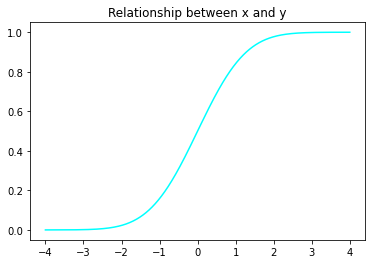

In [5]:
#range for capital
range_k = np.arange(0,1000)

#data set for individual ability
import scipy.stats as ss
x = np.linspace(-4,4,1000)
y = ss.norm.cdf(x)
plt.plot(x,y, color = 'cyan')
plt.title("Relationship between x and y")
range_x = y

#data for the wage rate in the market.
w_1= np.array(sorted(pm.Normal.dist(50,15).random(size=1000),reverse = True))

# Deposit rate
r=0.02





Optimum unconstrained capital function is defined as follows:

\begin{equation}
k_u^* = (x_i (\frac{β}{w})^β  (\frac{α}{1 + r})^{1-β})^\frac{1}{1 - α - β}
\end{equation}

In [6]:
def k_op(w,x,r):
    a=0.55
    b=0.35
    return (x*(b/w)**b * (a/(1+r))**(1-b) )**(1/(1-a-b))
df0 = k_op(w_1,range_x,0.02)

 Below we have an histogram for the wage distribution.

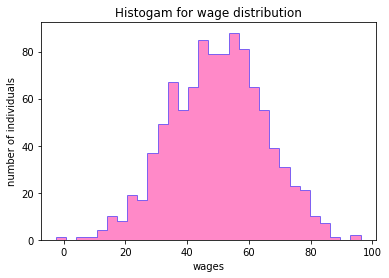

In [7]:
w_1= np.array(sorted(pm.Normal.dist(50,15).random(size=1000),reverse = True))
plt.hist(w_1, bins =30, alpha=0.5,
         histtype='stepfilled', color='deeppink',
         edgecolor='blue')
plt.title("Histogam for wage distribution")
plt.xlabel("wages")
plt.ylabel("number of individuals");

See above the histogram of wages. See below the histogram of maximum profit. 

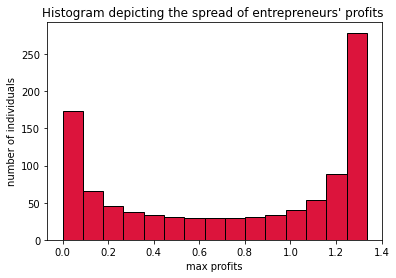

In [8]:
profit_max(range_x, df0, w_1)
plt.hist(profit_max(range_x, range_k, w_1),bins=15, color='crimson', edgecolor= 'black')
plt.xlabel("max profits")
plt.ylabel("number of individuals")
plt.title("Histogram depicting the spread of entrepreneurs' profits ")
plt.show()

In this histogram, we see two peaks. these can be classified as observations for high profits and no profits. This would then mean that individuals either invest their capital, become entrepreneurs and earn higher profits or individuals choose to become a part of the labor force and earn wages, making no profit on their capital. These are the low profit levels on the left side of the histogram.

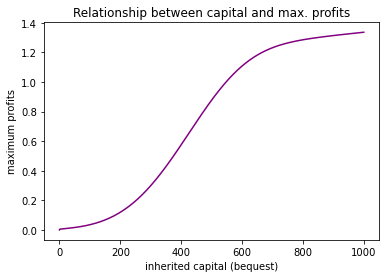

In [9]:
plt.plot(range_k, profit_max(range_x,range_k, w_1), color='purple')
plt.title("Relationship between capital and max. profits")
plt.xlabel("inherited capital (bequest)")
plt.ylabel("maximum profits"); #plot(x,y)

What can be derived from the graph above is the relationship between capital (inheretied bequest) and profits for the entrepreneural firm. Looking at the graph, it becomes clear that for people with lower bequests, it is only possible to obtain a lower amount of maximum profit. For subjects who inherit larger amounts of funds, increasingly higher profit are to be made when choosing the entrepreneurial occupation. The curve in the graph rises at a decreasing rate after capital values of around 400/500, indicating that above a certain threshold, additional capital will not increase maximum profits by as much as for people who are further left on the graph. E.g. a person going from 200 to 400 in capital see their max. profits rise from about 0.18 to 0.56 (211% increase), whereas a person going from 800 to 1000 in inherited capital, sees his/her max. profits rise from 1.25 to 1.35 (8% increase). 

Now, first, we are plotting the unconstrained capital optimization against the baseline profit to use for comparison later on.

/tmp/ipykernel_5847/1409921737.py:4: RuntimeWarning: invalid value encountered in power
  return (x*(b/w)**b * (a/(1+r))**(1-b) )**(1/(1-a-b))


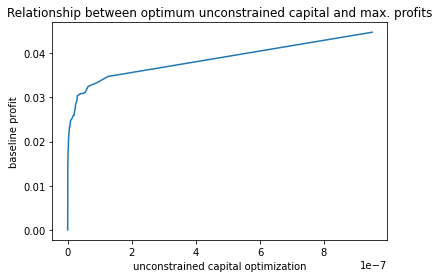

In [25]:
plt.plot(k_op(w_1,range_x,0.02), profit_max(range_x, df0, w_1) )
plt.title("Relationship between optimum unconstrained capital and max. profits")
plt.xlabel("unconstrained capital optimization")
plt.ylabel("baseline profit");

What we derive from this graph is the relationship between unconstrained opttimum capital (inherited bequest) and profits for the entrepreneural firm. We can observe from the graph above that unconstrained capital is optimised only at high levels of profit, in other words, high levels of profits optimizes capital. The lower the profit of the firm, the lesser the optimial use of the capital. Thus a baseline profit where unconstrained capital is zero might encourage individuals not to become entrepreneurs and they will not be optimizing their capital if they do so.
We can also observe there is a steep level of capital optimization as profits increase until profits become constant with increasing capital optimization.

Before starting with out extension of the model, we would like to show that optimizing can be done (as is requested in the list of components for final assignment), but does not generate compelling results. First, define again the function in question. We will optimize the unconstrained capital optimization problem.

* Another argument to supprot our above analysis regarding individual choices could be made using profit for the entrepreneur and the wages.


In [26]:
def capital_optimization_problem(x_example,wage_example,r_example): 
    β = 0.55
    α = 0.35
    rate_example = 1.02
    x_example = 0.5
    return (x_example*((β/wage_example)**β)*((α/1+rate_example)**1-β))**(1/1-α-β)

We assume a talent x(i) of 0.5 and a rate (r) of 1.02. What would be the optimal value of wage (w) to have profits maximized? See below.

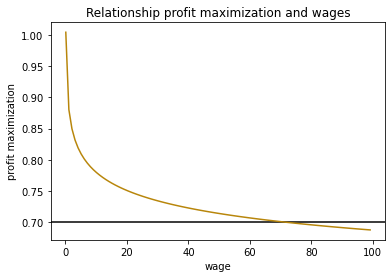

In [27]:
wage_example = np.arange(0.1,100)
x_range = np.arange(0.1,100.1)
plt.axhline(0.7,c='k')
plt.plot(x_range, [capital_optimization_problem(0.5,w,1.02) for w in x_range], color = 'darkgoldenrod') 
plt.title("Relationship profit maximization and wages") 
plt.xlabel("wage")
plt.ylabel("profit maximization");

We specify ranges to start from 0.1 instead of 0, to avoid warnings that are generated because something is being divided by zero (RuntimeWarning: divide by zero encountered in double_scalars). 

Next, we optimize:

In [29]:
from scipy import stats, optimize
optimize.fsolve(lambda w: capital_optimization_problem(0.5,w,1.02),50);

Obviously, this value is rather large. It basically means infinity. Why is this the case? As can be seen in the graph, the value of wage for which profit maximization is minimized is as high as possibly feasable. In reality, wages are kind of capped at a certain level. We could take the minus value (minus infinity) of wage, but common sense guards us against this. Also, simply looking at the plot tells us that for wage = 0, profit is maximized. This makes sense because people with 0 wages are probably entrepreneurs, that optimize profits due to their large inheritance. When wages are higher, people are workers, and their optimization is thus lower. 

#### EXTENSION OF THE MODEL

For our small extension of the model, we will introduce a new variable to the equation. This variable will be denoted by the letter 'f', and stands for inflation. We will try to estimate the occupational choice of an individual based on their inherited capital and the possible optimization of that capital. This will become more clear further on. First, we introduce this new variable. We estimated it to be 9% in The Netherlands for december 2022, based on recent numbers provided by Trading Economics. For official record of retrievement, [click here.](https://tradingeconomics.com/netherlands/inflationcpi#:~:text=6%2DMonth%20Low-,The%20Netherlands'%20annual%20inflation%20rate%20declined%20to%209.6%25%20in%20December,vs%2041.3%25%20in%20November)

*Recollect:* For the purpose of our extensions, we make one additional assumption. Individuals only have acess to their inheritance as a form of capital, and have no acess to any external sources of finance. 

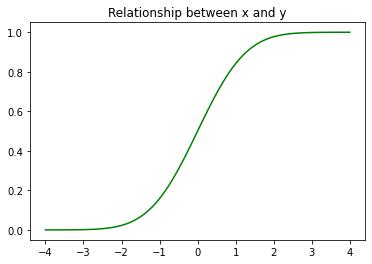

In [30]:
a = 0.55
b = 0.35
f = 0.09
w =  np.array(sorted(pm.Normal.dist(60,10).random(size=1000),reverse = True))
x = np.linspace(-4,4,1000)
import scipy.stats as ss
y = ss.norm.cdf(x)
plt.plot(x,y, color='green')
plt.title("Relationship between x and y")
range_x = y
range_k = np.arange(0,1000) #from above..

Next step is comparing the extensive (inflation adjusted) situation with the baseline. For that, we produce inflation corrected capital and profits. Remember that inflation rate is not some arbitrary number, but comes from the following [source](https://tradingeconomics.com/netherlands/inflationcpi#:~:text=6%2DMonth%20Low-,The%20Netherlands'%20annual%20inflation%20rate%20declined%20to%209.6%25%20in%20December,vs%2041.3%25%20in%20November). 
See below how we continue to construct our case. 

Specifying, once more for clarity, the deposit rate 'r' and inflation rate 'f'. Explanation of the following cel can be found below the cel.

In [31]:
r=0.02
f= 0.09 
w_inflation= w /1+f
r_inflation = (1+r)*(1+f)

Subsequently, we define optimum capital with inflation present. We do this by inserting inflation into the capital optimization equation as follows: 

Recall: optimum unconstrained capital function is defined as follows:

\begin{equation}
k_u^* = (x_i (\frac{β}{w})^β  (\frac{α}{1 + r})^{1-β})^\frac{1}{1 - α - β}
\end{equation}


We:
* Divide wage by (1+f) to get the inflation adjusted wage. 
* Multiply (1+r) with (1+f) to adjust rates for inflation.

When inflation is expected to rise, interest rates on savings accounts, mortgages and consumer loans will normally increase to compensate the lender for this rising inflation.
For a source about why rates change in this direction, please [click here.](https://www.homefinance.nl/marktrentes-economie/inflatie/) 

See below how the code looks after implementing this. 

In [32]:
def k_opinflation(w,x,r):
    a=0.55
    b=0.35
    return (x*(b/w/(1+f))**b * (a/(1+r)*(1+f))**(1-b) )**(1/(1-a-b))

Calculating inflation constrained optimum capital:

In [33]:
df1= k_opinflation(w_inflation,range_x,r_inflation)

Profit after adjusting for inflation follows as such:

In [34]:
df2= profit_max(range_x, k_opinflation(w_inflation,range_x,r_inflation), w_inflation) 

Thereafter, we are plotting inflation constrained profit on inflation constrained capital. 

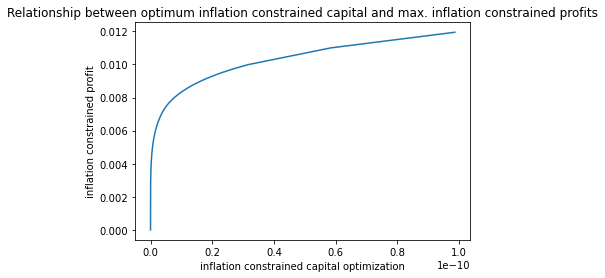

In [35]:
plt.plot(k_opinflation(w_inflation,range_x,r_inflation), profit_max(range_x, k_opinflation(w_inflation,range_x,r_inflation), w_inflation) )
plt.title("Relationship between optimum inflation constrained capital and max. inflation constrained profits")
plt.xlabel("inflation constrained capital optimization")
plt.ylabel("inflation constrained profit");

##### Explanation and economic intuition:

We may compare this graph to the baseline economy. If we do so, we see that in the case of inflation constrained capital optimization, curvature begins at a lower level of inflation constrained profits than in the baseline. The explanation for this lies in the fact that inflation eats into profit, capital, and wage all at once, and increases interest rates at the same time, resulting in reduced capital worth. It is not surprising that we see this result. Also, the curve is somewhat more gentle/smooth. We observe that at higher levels of capital optimzation, profits are not flat but continue increasing. This might indicate that a more gradual transition or hybrid occupational choice of individuals is also possible. 

Overall though, we see that the shape of the curve has stayed roughly the same, indicating that the relationship does not change dramatically. 
Subjects with high inheritance can optimize their capital easier, and thus make higher profits, and subjects with low inheritance can not optimize their capital (since it is too little) and probably choose to become a worker. In this regard, inflation does not matter that much. If there is something that can be said, it is that with inflation present, it takes lower profits (than baseline) to optimize capital.

 

# Discussion and conclusion

Our result allow us to evaluate whether the capital inherited by an individual can predict the occupational choice for a given individual. Our result show that:
- There is a clear relationship between capital and entrepreneurs' profits. At higher levels of capital, there are higher profits and at lower levels of capital there are lower profits, indicating an increased occupational choice to become an entrepreneur with higher capital.
- We also see optimization of capital at higher levels of profits and not at lower profit levels, further indicating that at lower levels of capital when profit is less, an individual will not be getting optimum value from their cpaital (inheritance/bequest) by investing in a project. They will be better off working as part of the labor force.
- After introducing inflation, we observe no change in the general trend. The higher the profits, the higher the optimization of inflation constrained capital, and at lower levels of profits, an individuals' inflation constrained capital is less optimised. Thus the occupational choice by an individual does not seem to change considerably after introducing inflation.



Possible weaknesses in our approach are the fact that we make some strong assumptions, which do not reflect in any way reality. Take for example the assumption that an individual has to invest all of its capital into either one or the other. Invest nothing and become a worker, or invest it all and become entrepreneur. Also, the assumption that individuals have no access to external finance is rather hefty. 

Further research could focus on the effect of inflation with weaker assumptions. Also, one may find it interesting to look at the wage component of this paper. Regarding other possible directions of research, it would be exciting to look into the effect of education on occupational choice, and the effect of demographic characteristics (e.g. age, sex, cultural background, religion) on occupational choice. The goal of the paper by Antunes et al. (2008) is not to study analytically the path of economic development, occupational choice or inequality, but to investigate quantitatively how financial frictions affect these variables in the long run. So, similar research can be done with the aim of looking at short-run implications of financial frictions. Eleviation of these frictions could potentially lift individuals from their initial financial position to a better developed one. Higher profits might be the result of this. 

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------